<a href="https://colab.research.google.com/github/jainaryan644/MAT-422/blob/main/HW3_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3.7.1 Mathematical Formulation

Description:
The mathematical formulation of a neural network involves defining how inputs are transformed through layers to produce outputs. Neural networks consist of multiple layers, each with neurons (nodes) that apply linear transformations to the inputs and pass them through activation functions to introduce non-linearity.

Key Concepts:

Input layer: Accepts the features or inputs to the network.
Hidden layers: Process the input through neurons and activation functions.
Output layer: Produces the final output of the network.
Weights (𝑊) and biases (𝑏): Parameters adjusted during training.

Mathematical Explanation: For a single neuron in a neural network:

𝑧 = 𝑊 ⋅ 𝑋 + 𝑏

where:

𝑋 is the input vector,
𝑊 is the weight vector,
𝑏 is the bias term.
Then, we apply an activation function
𝜎(𝑧) to introduce non-linearity:

𝑎 = 𝜎(𝑧)

𝑎 is the output (or activation) of the neuron.

For a layer of neurons, this process is repeated for each neuron in the layer.

In [9]:
import numpy as np
import matplotlib.pyplot as plt


In [10]:

# Define the activation function (ReLU in this case)
def relu(z):
    return np.maximum(0, z)

# Sample input vector (features)
X = np.array([1.0, 2.0, 3.0])

# Initialize weights and biases for each layer
# Layer 1
W1 = np.array([[0.2, 0.4, 0.6], [-0.5, 0.3, -0.8]])  # 2 neurons, each with 3 inputs
b1 = np.array([0.1, -0.2])

# Layer 2
W2 = np.array([[0.3, -0.7], [0.5, 0.1]])  # 2 neurons, each with 2 inputs from the previous layer
b2 = np.array([0.3, 0.1])

# Output Layer (Layer 3)
W3 = np.array([[0.4, 0.6]])  # 1 output neuron with 2 inputs from the previous layer
b3 = np.array([0.2])

# Feedforward Pass
# Layer 1
z1 = np.dot(W1, X) + b1
a1 = relu(z1)

# Layer 2
z2 = np.dot(W2, a1) + b2
a2 = relu(z2)

# Output Layer (Layer 3)
z3 = np.dot(W3, a2) + b3
a3 = z3  # Assuming a linear output for regression, no activation function here

print("Output of Layer 1 (a1):", a1)
print("Output of Layer 2 (a2):", a2)
print("Final Output (a3):", a3)


Output of Layer 1 (a1): [2.9 0. ]
Output of Layer 2 (a2): [1.17 1.55]
Final Output (a3): [1.598]


3.7.2 Activation Functions

Description:
Activation functions are mathematical functions applied to the output of each neuron. They introduce non-linearity, allowing the network to learn complex patterns. Without activation functions, neural networks would only perform linear transformations, limiting their expressive power.

Key Math Concepts:
Sigmoid: σ(z) = 1 / (1+e^-z) ranges from 0 to 1
ReLU: σ(z) = max (0, z) introduces sparsity and avoids the vanishing gradient problem

Tanh: tanh(z) = (e^z - e^-z) / (e^z + e^-z) ranges from -1 to 1

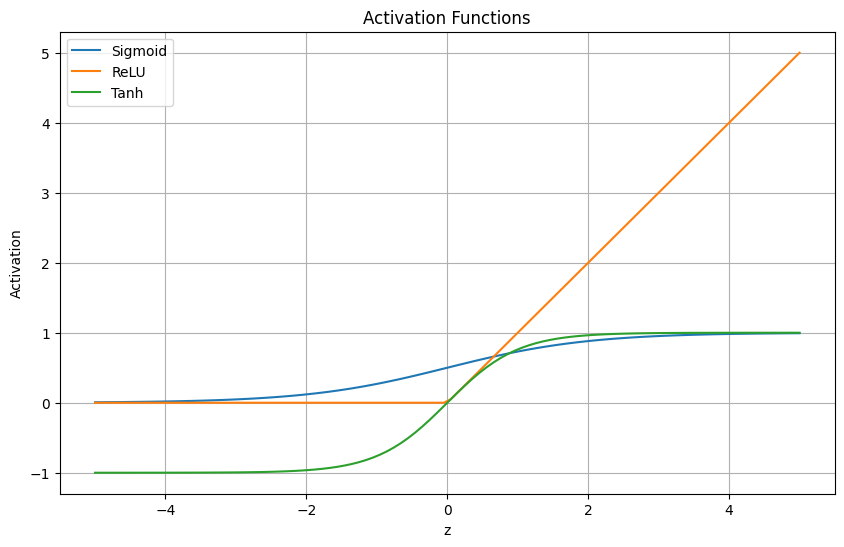

In [11]:

# Define activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def tanh(z):
    return np.tanh(z)

# Generate values to plot
z = np.linspace(-5, 5, 100)

# Plot activation functions
plt.figure(figsize=(10, 6))
plt.plot(z, sigmoid(z), label="Sigmoid")
plt.plot(z, relu(z), label="ReLU")
plt.plot(z, tanh(z), label="Tanh")
plt.title("Activation Functions")
plt.xlabel("z")
plt.ylabel("Activation")
plt.legend()
plt.grid()
plt.show()


3.7.3 Cost Function

The cost function (or loss function) measures the difference between the predicted values and the actual values. In neural networks, the goal is to minimize the cost function by adjusting the weights and biases through training.

Key concepts:
Mean Square Error: Used for regression tasks
Cross-Entropy Loss: Commonly used for classification tasks

Mathematical Explanation:
1. MSE for regression:
MSE = 1/n n∑i=1 (yi - yhati)^2
2. Cross-entropy loss for binary classification:
= -1/n n∑i=1[yi log(yhati) + (1-yi)log(1-yhati)]



In [12]:
# Sample true and predicted values
y_true = np.array([1, 0, 1, 1])
y_pred = np.array([0.9, 0.2, 0.7, 0.8])

# Mean Squared Error
mse = np.mean((y_true - y_pred) ** 2)
print(f"Mean Squared Error: {mse}")

# Cross-Entropy Loss
cross_entropy_loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
print(f"Cross-Entropy Loss: {cross_entropy_loss}")


Mean Squared Error: 0.045
Cross-Entropy Loss: 0.22708064055624455


3.7.4 Backpropagation
Backpropagation is the process of computing the gradients of the cost function with respect to the weights and biases in the network. These gradients are used to update the parameters during training, allowing the network to learn.

Key Concepts:

Gradient: The derivative of the cost function with respect to each parameter.
Chain Rule: Used to compute the gradients layer by layer, moving backward from the output layer to the input layer.
Mathematical Explanation: Backpropagation applies the chain rule to calculate the gradient of the cost function with respect to each parameter. If 𝐶 is the cost function, the gradient of 𝐶 with respect to a weight 𝑤 in a given layer is computed by differentiating each layer step-by-step

In [13]:
# Simplified example: gradient of cost with respect to weights
y_true = 1
y_pred = 0.9

# Calculate the error
error = y_pred - y_true

# Gradient of the cost function with respect to y_pred
grad_y_pred = 2 * error

# Suppose the input to the neuron was x = 0.5 and weight was w = 0.4
x = 0.5
w = 0.4

# Backpropagate the gradient to calculate the gradient with respect to the weight
grad_w = grad_y_pred * x
print(f"Gradient with respect to weight: {grad_w}")


Gradient with respect to weight: -0.09999999999999998


3.7.5 Backpropagation Algorithm

Description:
The backpropagation algorithm uses the gradients computed during backpropagation to update the network’s weights and biases. This is typically done using an optimization algorithm like gradient descent.

Key Concepts:

Learning Rate: Controls the size of the updates to the weights and biases.
Gradient Descent: An optimization technique that adjusts parameters in the opposite direction of the gradient.

Mathematical Explanation: In gradient descent, the weights and biases are updated as follows:

w = w - a (∂C/∂w)
b = b - a (∂C/∂b)

where:
a is the learning rate,
∂C/∂w is the gradient of the cost function with respect to b
∂C/∂b is the gradient of the cost function with respect to b


In [14]:
 # Sample data
x = 0.5  # Input
y_true = 1  # True output
w = 0.4  # Initial weight
b = 0.1  # Initial bias
learning_rate = 0.01

# Forward pass: prediction
y_pred = w * x + b

# Compute the cost (MSE)
error = y_pred - y_true
cost = error ** 2

# Backward pass: compute gradients
grad_y_pred = 2 * error
grad_w = grad_y_pred * x
grad_b = grad_y_pred

# Update weights and biases
w -= learning_rate * grad_w
b -= learning_rate * grad_b

print(f"Updated weight: {w}")
print(f"Updated bias: {b}")


Updated weight: 0.40700000000000003
Updated bias: 0.114
